<a href="https://colab.research.google.com/github/FarshadBorjalizade/ImagePprocessing-ComputerVision/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip '/content/flowers-recognition.zip'

Archive:  /content/flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.

In [ ]:
! pip install opendatasets
! pip install split-folders

In [ ]:
import opendatasets as od
import os
import shutil
import splitfolders
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf

In [ ]:
dataset_path='/content/flowers'
split_path='/content/drive/MyDrive/Dataset/flowers'
def pre_process(dataset_path, split_path):
    # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
    split_data = splitfolders.ratio(dataset_path, output=split_path, seed=1337, ratio=(.8, .2), group_prefix=None)
    print(f'pre process done and dataset split to ---> {split_path}/ .')
    return split_data

pre_process(dataset_path, split_path)

Copying files: 4317 files [00:56, 76.59 files/s]

pre process done and dataset split to ---> /content/drive/MyDrive/Dataset/flowers/ .


In [ ]:
dataset_dir = split_path

labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data(os.path.join(dataset_dir, 'train'))
val = get_data(os.path.join(dataset_dir, 'val'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
print(train.shape, val.shape)
print(type(train), type(val))

(3452, 2) (865, 2)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(train[0])

[array([[[3, 1, 2],
        [3, 1, 2],
        [3, 1, 2],
        ...,
        [5, 4, 2],
        [5, 4, 2],
        [5, 4, 2]],

       [[3, 1, 2],
        [3, 1, 2],
        [3, 1, 2],
        ...,
        [5, 4, 2],
        [5, 4, 2],
        [5, 4, 2]],

       [[3, 1, 2],
        [3, 1, 2],
        [3, 1, 2],
        ...,
        [5, 4, 2],
        [5, 4, 2],
        [5, 4, 2]],

       ...,

       [[8, 7, 5],
        [8, 7, 5],
        [8, 7, 5],
        ...,
        [7, 8, 3],
        [7, 7, 5],
        [7, 7, 5]],

       [[7, 6, 4],
        [8, 7, 5],
        [8, 7, 5],
        ...,
        [7, 8, 4],
        [7, 7, 5],
        [7, 7, 5]],

       [[7, 6, 4],
        [7, 6, 4],
        [8, 7, 5],
        ...,
        [7, 8, 3],
        [7, 7, 5],
        [7, 7, 5]]], dtype=uint8)
 0]


In [ ]:
labels_train ={'daisy':0, 'dandelion':0, 'rose':0, 'sunflower':0, 'tulip':0}
for i in range(len(train)):
    if train[i][1] == 0:
        labels_train['daisy'] += 1
    elif train[i][1] == 1:
        labels_train['dandelion'] += 1
    elif train[i][1] == 2:
        labels_train['rose'] += 1
    elif train[i][1] == 3:
        labels_train['sunflower'] += 1
    else:
        labels_train['tulip'] += 1
print(labels_train)

{'daisy': 611, 'dandelion': 841, 'rose': 627, 'sunflower': 586, 'tulip': 787}


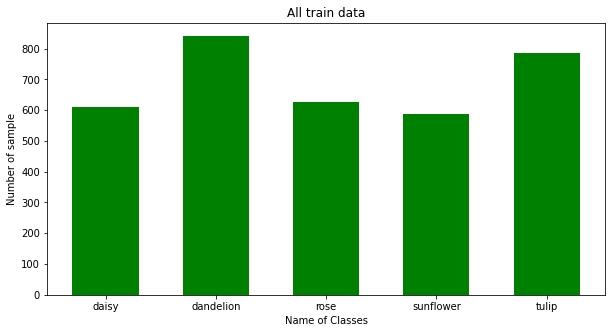

In [ ]:
classes = list(labels_train.keys())
values = list(labels_train.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classes, values, color ='g', width = 0.6)
 
plt.xlabel("Name of Classes")
plt.ylabel("Number of sample")
plt.title("All train data")
plt.show()

Text(0.5, 1.0, 'daisy')

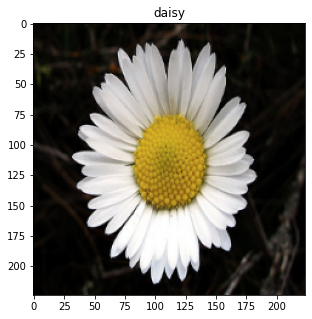

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(train[1][0])
plt.title(labels[train[1][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)
print(y_train.shape, y_train.dtype)
print(y_val.shape, y_val.dtype)

(3452, 5) float32
(865, 5) float32


In [ ]:
prev_state = np.random.get_state()
np.random.shuffle(x_train)
np.random.set_state(prev_state)
np.random.shuffle(y_train)

In [ ]:
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)
print(y_train, y_val)

(3452, 224, 224, 3) (865, 224, 224, 3)
(3452, 5) (865, 5)
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]] [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(3452, 224, 224, 3) (3452, 5) (865, 224, 224, 3) (865, 5)


In [ ]:
def make_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=2, padding="same")(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(x)

    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")(x)

    x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(filters=515, kernel_size=(3, 3), strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(units, activation=activation)(x)
    return tf.keras.Model(inputs, outputs)

In [ ]:
flower_model = make_model(input_shape=(img_size, img_size, 3), num_classes=5)
flower_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 56, 56, 64)       256       
 hNormalization)                                             

In [ ]:
callbacks = [ tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5")]

flower_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])

epochs = 20
history = flower_model.fit(x_train, y_train,
          epochs=epochs,
          shuffle=True,
          batch_size=64,
          callbacks=callbacks,
          validation_data=(x_val, y_val),
)

Epoch 1/20
54/54 [==============================] - 20s 149ms/step - loss: 1.4408 - accuracy: 0.4635 - val_loss: 1.6108 - val_accuracy: 0.2439
Epoch 2/20
54/54 [==============================] - 6s 120ms/step - loss: 1.0134 - accuracy: 0.6095 - val_loss: 1.7872 - val_accuracy: 0.2486
Epoch 3/20
54/54 [==============================] - 6s 116ms/step - loss: 0.8012 - accuracy: 0.6993 - val_loss: 1.8683 - val_accuracy: 0.2439
Epoch 4/20
54/54 [==============================] - 6s 114ms/step - loss: 0.6085 - accuracy: 0.7714 - val_loss: 3.3129 - val_accuracy: 0.2439
Epoch 5/20
54/54 [==============================] - 6s 112ms/step - loss: 0.4716 - accuracy: 0.8218 - val_loss: 2.5326 - val_accuracy: 0.2578
Epoch 6/20
54/54 [==============================] - 6s 113ms/step - loss: 0.2875 - accuracy: 0.8960 - val_loss: 2.3426 - val_accuracy: 0.3353
Epoch 7/20
54/54 [==============================] - 6s 112ms/step - loss: 0.2023 - accuracy: 0.9267 - val_loss: 2.9836 - val_accuracy: 0.3803
Epoch

In [ ]:
epochs_range = range(20)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

In [ ]:
chess_model.evaluate(x=x_val, y=y_val,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False
    )

28/28 [==============================] - 1s 31ms/step - loss: 2.3931 - accuracy: 0.5561


[2.393127679824829, 0.5560693740844727]

In [ ]:
input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))

In [ ]:
base_model = tf.keras.applications.MobileNet(
                                                input_shape=(img_size, img_size, 3),
                                                alpha=1.0,
                                                depth_multiplier=1,
                                                dropout=0.001,
                                                include_top=False,
                                                weights="imagenet",
                                                input_tensor=input_tensor,
                                                pooling='max',
                                                classes=1000,
                                                classifier_activation="softmax",
)

In [ ]:
    for layer in base_model.layers:
        layer.trainable = False  # trainable has to be false in order to freeze the layers
        
    op = tf.keras.layers.Dense(256, activation='relu')(base_model.output)
    op = tf.keras.layers.Dropout(.25)(op)

    output_tensor = tf.keras.layers.Dense(5, activation='softmax')(op)

    model_mobile_net2 = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

In [ ]:
model_mobile_net2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model_mobile_net2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_mobile_net2.fit(x=x_train, y=y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=2,
                    callbacks=None,
                    validation_split=0.0,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    class_weight=None,
                    sample_weight=None,
                    initial_epoch=0,
                    steps_per_epoch=None,
                    validation_steps=None,
                    validation_batch_size=None,
                    validation_freq=1,
                    max_queue_size=10,
                    workers=1,
                    use_multiprocessing=False,
)

Epoch 1/20
108/108 - 24s - loss: 1.4638 - accuracy: 0.6643 - val_loss: 0.5709 - val_accuracy: 0.7780 - 24s/epoch - 218ms/step
Epoch 2/20
108/108 - 10s - loss: 0.5298 - accuracy: 0.8105 - val_loss: 0.4491 - val_accuracy: 0.8208 - 10s/epoch - 97ms/step
Epoch 3/20
108/108 - 10s - loss: 0.4263 - accuracy: 0.8537 - val_loss: 0.3465 - val_accuracy: 0.8798 - 10s/epoch - 92ms/step
Epoch 4/20
108/108 - 10s - loss: 0.3475 - accuracy: 0.8754 - val_loss: 0.3665 - val_accuracy: 0.8786 - 10s/epoch - 91ms/step
Epoch 5/20
108/108 - 10s - loss: 0.3120 - accuracy: 0.8888 - val_loss: 0.3719 - val_accuracy: 0.8671 - 10s/epoch - 92ms/step
Epoch 6/20
108/108 - 10s - loss: 0.2876 - accuracy: 0.8879 - val_loss: 0.4407 - val_accuracy: 0.8543 - 10s/epoch - 91ms/step
Epoch 7/20
108/108 - 10s - loss: 0.2294 - accuracy: 0.9122 - val_loss: 0.3778 - val_accuracy: 0.8717 - 10s/epoch - 97ms/step
Epoch 8/20
108/108 - 10s - loss: 0.1886 - accuracy: 0.9290 - val_loss: 0.3254 - val_accuracy: 0.8936 - 10s/epoch - 91ms/step

In [ ]:
model_mobile_net2.evaluate(
    x=x_val,
    y=y_val,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False
    )

28/28 [==============================] - 2s 79ms/step - loss: 0.4949 - accuracy: 0.8740


[0.49489229917526245, 0.8739884495735168]

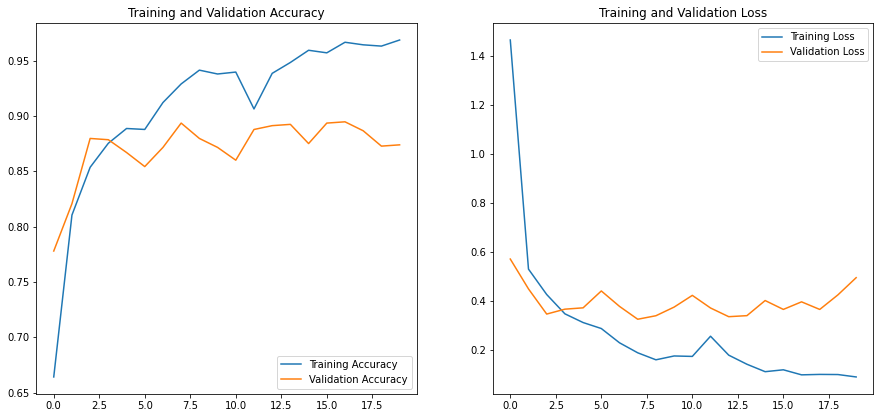

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
prediction2 = model_mobile_net2.predict(
                x_val,
                batch_size=None,
                verbose=2,
                steps=None,
                callbacks=None,
                max_queue_size=10,
                workers=1,
                use_multiprocessing=False,
)

predictions2 = np.argmax(prediction2, axis=1)

28/28 - 3s - 3s/epoch - 91ms/step


In [ ]:
y_true = []
for item in y_val:
    if item[0] == 1:
        y_true.append(0)
    elif item[1] == 1:
        y_true.append(1)
    elif item[2] == 1:
        y_true.append(2)
    elif item[3] == 1:
        y_true.append(3)
    else:
        y_true.append(4)

y_true = np.array(y_true)

<Figure size 720x576 with 0 Axes>

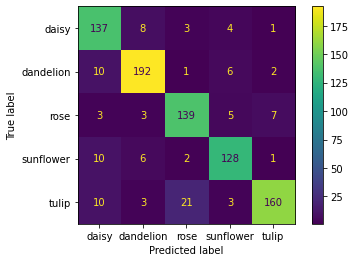

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(10,8))
cm = confusion_matrix(y_true, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()